# __Regresiones Robustas__

Son tecnicas de regresion que resisten mejor los efectos de valores atipicos en los datos. A diferencia de la regresion lineal estandar, que minimiza el error cuadratico medio (MSE) y puede verse afectada por outliers, las regresiones robustas utilizan funciones de perdida menos sensibles a los outliers.

Por lo general siempre se cuenta con una fase de preprocesamiento en la cual se eliminan o transforman datos y se tratan los outliers. Sin embargo, hay ocasiones donde se requiere tratar estos valores directamente durante la aplicacion del modelo y es alli donde toman relevancia los modelos robustos que facilitan este proceso. 

Debemos entender que los valores atipicos son observaciones que no siguen el patron de las demas observaciones y violan los supuestos en los que se basa MSE lo que compromete el resultado de la regresion lineal.

Las tecnicas de regresion robusta que nos ofrece Scikit - Learn son:

- Huger Regressor.
- RANSAC Regressor.
- TheilSenRegressor.

En lo que sigue veamos como funciona y como se implementa cada una de ellas

# __Huger Regressor__

La regresion Huber modifica la funcion de perdida de la regresion lineal para reducir el impacto de los valores atipicos. Combina las fortalezas del Error Cuadratico Medio (MSE) y del Error Absoluto Medio (MAE), cambiando de MSE a MAE cuando los errores superan un umbral especifico representado por $\delta$

La funcion de perdida de Huber viene representada por:

$$L_{\delta}(r) = \left\{\begin{matrix}
\frac{1}{2}r^2 & si \left | r\right | \leq \delta\\
\delta(\left | r\right | - \frac{1}{2}\delta) &  si \left | r\right | > \delta\\
\end{matrix}\right.$$

Donde,

- $r = y_i - \hat{y_{i}}$, es el error entre la prediccion y el valor real (MSE).

- $\delta$ es un parametro que define cuando el error deja de ser cuadratico (MSE) y pasa a ser lineal (MAE).

Si el error es pequeno ($\left | r\right | \leq \delta$) tratamos el outlier como un dato confiable y lo penalizamos con MSE. En cambio, si el error es grande ($\left | r\right | > \delta$) tratamos el outlier con mayor severidad penalizandolo con MAE. Esto hace que la regresion de Huber considere los outliers y los penalice ligeramente haciendose resistente frente a ellos. 

## Como funciona?

Vamos a comparar como evaluan los errores las funciones de costo de la regresion estandar vs Huber dado un mismo modelo, luego veremos un ejemplo donde comparamos ambos modelos entrenados. Los datos vienen representados en la siguiente tabla:

| $x_i$ | $y_i$               |
| ----- | ------------------- |
| 1     | 2                   |
| 2     | 4                   |
| 3     | 100       ← outlier |
| 4     | 8                   |

El modelo que vamos a utilizar tiene como parametros $w = 1.5$ y $b=0.5$. La ecuacion del modelo es:

$$\hat{y} = 1.5x + 0.5$$

Procedemos a calcular las predicciones $\hat{y_i}$ que arroja el modelo para cada dato.

- Para $x=1$:   $\hat{y_1} = 1.5(1) + 0.5 = 1.5 + 0.5 \Rightarrow \hat{y_1} = 2$

- Para $x=2$:   $\hat{y_2} = 1.5(2) + 0.5 = 3.0 + 0.5 \Rightarrow \hat{y_2} = 3.5$

- Para $x=3$:   $\hat{y_3} = 1.5(3) + 0.5 = 4.5 + 0.5 \Rightarrow \hat{y_3} = 5$

- Para $x=4$:   $\hat{y_4} = 1.5(4) + 0.5 = 6 + 0.5 \Rightarrow \hat{y_4} = 6.5$


Ahora calculamos el error entre las predicciones del modelo y el valor real.

- $r_1 = y_1 - \hat{y_1} = 2 - 2 = 0$

- $r_2 = y_2 - \hat{y_2} = 4 - 3.5 = 0.5$

- $r_3 = y_3 - \hat{y_3} = 100 - 5 = 95$

- $r_4 = y_4 - \hat{y_4} = 8 - 6.5 = 1.5$

--- 

Calculamos la __funcion de costo de Huber para cada dato__, seleccionando el valor del delta como $\delta = 1$. Sabemos que la funcion de perdida de Huber viene dada por:

$$L_{\delta}(r) = \left\{\begin{matrix}
\frac{1}{2}r^2 & si \left | r\right | \leq \delta\\
\delta(\left | r\right | - \frac{1}{2}\delta) &  si \left | r\right | > \delta\\
\end{matrix}\right.$$

__Para__ $r_1 = 0$, vemos que $\left | r_1\right | \leq 1$ por tanto, utilizamos la ecuacion que cumple esta condicion:

$$L(r_1) = \frac{1}{2}(0)^2 = 0$$

__Para__ $r_2 = 0.5$, vemos que $\left | r_2\right | \leq 1$ por tanto, utilizamos la misma ecuacion anterior:

$$L(r_2) = \frac{1}{2}(0.5)^2 = 0.125$$

__Para__ $r_3 = 95$, vemos que $\left | r_3\right | > 1$ por tanto, utilizamos la ecuacion que cumple la condicion:

$$L(r_3) = 1(95 - 0.5) = 94.5$$

__Para__ $r_4 = 1.5$, vemos que $\left | r_4\right | > 1$ por tanto, utilizamos la ecuacion anterior:

$$L(r_4) = 1(1.5 - 0.5) = 1$$

El costo total de Huber viene dado por el promedio de la perdida de Huber para cada dato:

$$L_{\delta} = \frac{1}{3}(L(r_1) + L(r_2) + L(r_3) + L(r_4)) = \frac{1}{4}(0 + 0.125 + 94.5 + 1) = 94.875$$

--- 

Ahora, calculamos la __funcion de costo de la regresion estandar para cada dato__, que viene expresada mediante la siguiente ecuacion:

$$L_{MSE} =  \frac{1}{2}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{2}r^2$$

__Para__ $r_1 = 0$ tenemos,

$$L_1 = \frac{1}{2}(0)^2 = 0$$

__Para__ $r_2 = 0.5$ tenemos,

$$L_2 = \frac{1}{2}(0.5)^2 = 0.125$$

__Para__ $r_3 = 95$ tenemos,

$$L_3 = \frac{1}{2}(95)^2 = \frac{1}{2}(9025) = 4512.5$$

__Para__ $r_4 = 1.5$ tenemos,

$$L_4 = \frac{1}{2}(1.5)^2 = \frac{1}{2}(2.25) = 1.125$$

El costo total de MSE viene dado por el promedio de la perdida MSE de cada dato

$$L_{MSE} = \frac{1}{3}(L_1 + L_2 + L_3 + L_4) =\frac{0 + 0.125 + 4512.5 + 1.125}{4} = 1128.4375$$

El error dado por MSE de la regresion estandar no esta en la escala de los datos, por tanto, obtenemos el error real con $RMSE$ tal como sigue:

$$RMSE = \sqrt{MSE}$$

Entonces, el error real de la regresion estandar es:

$$L_{RMSE} = \sqrt{L_{MSE}} = \sqrt{1128.4375} = 33.59$$

---

> Al comparar el costo total de $L_{\delta}$ y $L_{RMSE}$ se evidencia que Huber es mucho mayor que la regresion estandar. 

> Huber penaliza los outliers suavemente sin ignorarlos, lo que hace que el error aumente pero se compensa con un mejor ajuste sobre la mayor parte de los datos. 

> La regresion estandar otorga mayor relevancia a los outliers viendose afectado su ajuste por estos mismos. Es sensible a outliers debido a que MSE los penaliza fuertemente.

 En el siguiente ejemplo en codigo, vamos a utilizar los mismos datos del ejemplo anterior, pero esta vez, entrenando ambos modelos para mostrar como se ajusta cada modelo a los datos y evidenciar la utilidad de la regresion Huber ante la presencia de outliers.

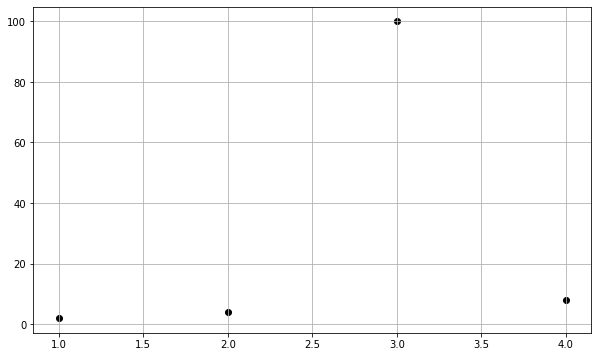

In [53]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import mean_squared_error

# datos con los cual trabajar
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 100, 8])  # 100 es un outlier

# visualicemos los datos en un scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.grid(True)
plt.show()

In [54]:
# Crear modelo de regresión lineal y ajustarlo a los datos
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# obtener metrica de evaluacion
y_pred_lin = lin_reg.predict(X)
mse = mean_squared_error(y, y_pred_lin)

# Crear modelo de regresión Huber y ajustarlo a los datos. Asignamos un epsilon de 1.35
huber = HuberRegressor(epsilon=1.35)
huber.fit(X, y)

# obtener metrica de evaluacion
y_pred_huber = huber.predict(X)
mse_huber = mean_squared_error(y, y_pred_huber)

# Mostrar coeficientes de cada modelo junto a su metrica de evaluacion
print(f"Linear Regression: w = {lin_reg.coef_[0]:.2f}, b = {lin_reg.intercept_:.2f}")
print(f"Huber Regression:  w = {huber.coef_[0]:.2f}, b = {huber.intercept_:.2f}")
print(f"MSE (Linear): {mse:.2f}")
print(f"MSE (Huber):  {mse_huber:.2f}")

Linear Regression: w = 11.40, b = 0.00
Huber Regression:  w = 2.00, b = -0.00
MSE (Linear): 1546.30
MSE (Huber):  2209.00


> Vemos que el modelo de regresion lineal entrenado presenta los parametros $w = 11.40$ y $b=0$. Mientras que el modelo Huber presenta como parametros $w = 2$ y $b=0$

> El $MSE$ de la regresion Huber es mayor que el de la regresion lineal. Sin embargo, este se ajusta mejor a la mayoria de los datos como veremos en la siguiente grafica

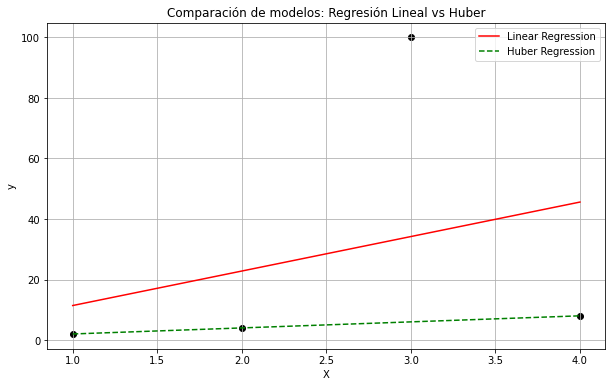

In [55]:
# Visualización de ambos modelos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.plot(X, y_pred_lin, label='Linear Regression', color='red')
plt.plot(X, y_pred_huber, label='Huber Regression', color='green', linestyle='--')
plt.title('Comparación de modelos: Regresión Lineal vs Huber')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

> A pesar que la regresion Huber presenta un error mayor, se ajusta mejor a la tendencia de la mayoria de los datos.

> Se evidencia que la regresion lineal es sensible a la presencia de outliers ya que sesga el ajuste del modelo hacia estos valores.

## Implementacion de la Regresion Huber con Scikit Learn

En el siguiente ejemplo vamos a comparar la regresion lineal con la regresion Huber y mostrar las ventajas de utilizar esta ultima ante la presencia de outliers. Analizaremos un conjunto de 100 datos artificiales entre los cuales se encuentran 5 outliers y evaluaremos el rendimiento de ambos modelos.

In [56]:
# Configurar el estilo de los gráficos
plt.style.use('seaborn-colorblind')
sns.set_palette("husl")

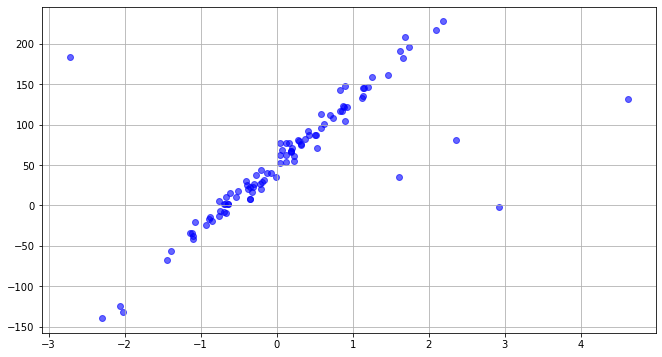

In [57]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
import random


# Semillas para reproducibilidad
np.random.seed(42)

# 1. Generar datos artificiales con comportamiento lineal
X, y = make_regression(n_samples=100, n_features=1, noise=10, bias=50, random_state=1)

# 2. Agregar outliers a las primeras 5 muestras en X
for i in range(5):
    factor = random.randint(2, 4)
    if random.random() > 0.5:
        X[i] += factor * X.std()
    else:
        X[i] -= factor * X.std()

# mostrar los datos en un scatterplot
fig, ax = plt.subplots(figsize=(11, 6))
ax.scatter(X, y, label="Datos", color='blue', alpha=0.6)
ax.grid(True)
plt.show()

In [58]:

# 3. Crear modelos y ajustarlo a los datos
lr = LinearRegression()
huber = HuberRegressor(epsilon=1)

# ajustar modelos
lr.fit(X, y)
huber.fit(X, y)

# 4. obtener predicciones de ambos modelos
y_pred_lr = lr.predict(X)
y_pred_huber = huber.predict(X)

# 5. Métricas para evaluar los modelos
# MSE
mse_lr = mean_squared_error(y, y_pred_lr)
mse_huber = mean_squared_error(y, y_pred_huber)
# MAE
mae_lr = mean_absolute_error(y, y_pred_lr)
mae_huber = mean_absolute_error(y, y_pred_huber)
# R2
r2_lr = r2_score(y, y_pred_lr)
r2_huber = r2_score(y, y_pred_huber)

print("Regresión Lineal")
print("MSE:", mse_lr)
print('MAE:', mae_lr )
print("R2:", r2_lr)

print("\nRegresión Huber")
print("MSE:", mse_huber)
print('MAE:', mae_huber)
print("R2:", r2_huber)

Regresión Lineal
MSE: 2338.4674655470553
MAE: 29.996471051773543
R2: 0.5587643495892418

Regresión Huber
MSE: 3360.038416017732
MAE: 18.71543794502081
R2: 0.366008397491265


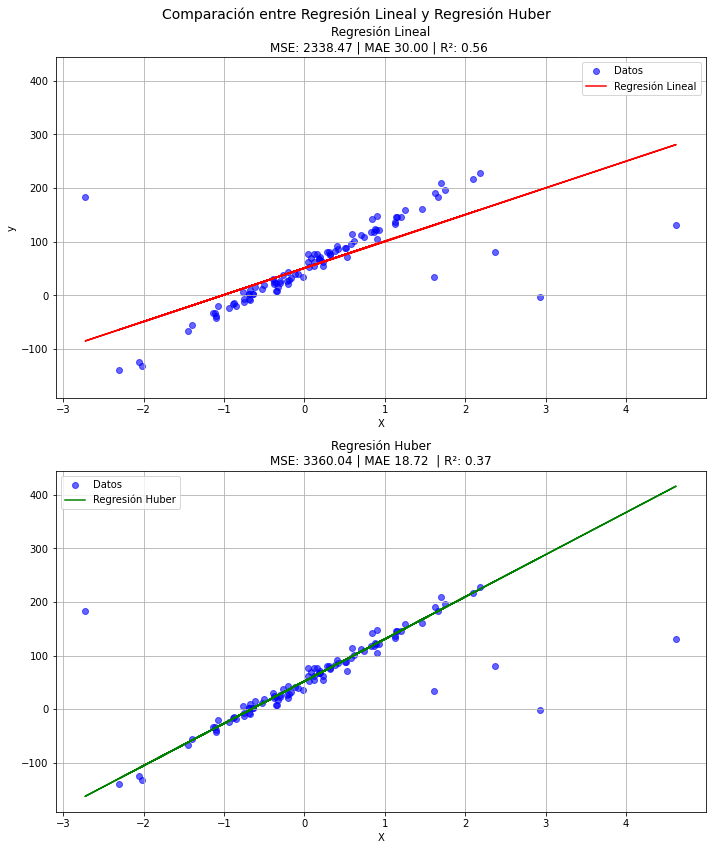

In [59]:
# 6. Visualización de los modelos
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharey=True)

# Subgráfica Regresión Lineal
axes[0].scatter(X, y, label="Datos", color='blue', alpha=0.6)
axes[0].plot(X, y_pred_lr, color='red', label="Regresión Lineal")
axes[0].set_title(f"Regresión Lineal\nMSE: {mse_lr:.2f} | MAE {mae_lr:.2f} | R²: {r2_lr:.2f} ")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].grid(True)

# Subgráfica Regresión Huber
axes[1].scatter(X, y, label="Datos", color='blue', alpha=0.6)
axes[1].plot(X, y_pred_huber, color='green', label="Regresión Huber")
axes[1].set_title(f"Regresión Huber\nMSE: {mse_huber:.2f} | MAE {mae_huber:.2f}  | R²: {r2_huber:.2f}")
axes[1].set_xlabel("X")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Comparación entre Regresión Lineal y Regresión Huber", fontsize=14)
plt.tight_layout()
plt.show()